# AIN429 PROJECT


# Car Price Prediction


## Arda Deniz Ayyildiz 2210765018
## MAhmut Arda Gumus 2200765006

# Part 1 Data Analysis

In [77]:
import pandas as pd

file_path = 'car_price_prediction_.csv'

car_data = pd.read_csv(file_path)

print(car_data.head())


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  


## Dataset Overview
The dataset contains 10 features and 2,500 rows, providing detailed information on various aspects of cars.

### Features Breakdown

#### Car ID: Unique identifier for each car (not useful for analysis, can be dropped).

#### Brand: The manufacturer of the car (e.g., Tesla, BMW, Audi). Helps assess brand influence on price.

#### Year: Manufacturing year. Generally, newer cars are priced higher, though depreciation rates vary.

#### Engine Size: Engine capacity in liters. Larger engines often imply better performance and higher cost.

#### Fuel Type: Fuel used by the car (Petrol, Diesel, Electric, Hybrid). Fuel type impacts price, with electric and hybrid vehicles often priced higher.

#### Transmission: Type of transmission (Manual or Automatic). Automatic transmissions are typically more expensive.

#### Mileage: Total distance the car has traveled. Higher mileage often decreases value.

#### Condition: Current state of the car (New, Used, Like New). Strongly influences price.

#### Price: Target variable to predict; represents the car's market value.

#### Model: Specific car model, adding granularity when paired with the brand.

### Key Observations

#### Price Distribution:

#### Range: $5,011 to $99,982.

#### Average: $52,638.


#### Skewed towards affordable vehicles, with most cars priced in the low-to-mid range.

#### Year: Covers cars manufactured between 2000 and 2023, offering insights into depreciation trends.

#### Engine Size: Ranges from 1.0L to 6.0L, encompassing compact cars to high-performance vehicles.

#### Mileage:Higher mileage cars tend to be valued lower due to wear and tear.

#### Relationships in the Data

#### Year vs. Price: Newer cars tend to have higher prices.

#### Mileage vs. Price: Cars with higher mileage are valued lower, indicating negative correlation.

#### Engine Size vs. Price: Cars with larger engines are generally more expensive, reflecting performance attributes.

### Potential Insights

#### Brand and Model Impact: Certain brands and models may retain value better or command a premium due to brand perception or reliability.

#### Fuel Type Trends: Electric and hybrid cars may show increasing prices, driven by demand for sustainable and technologically advanced options.

#### Regional or Condition Impact: If geographic data is available, it can highlight price variations based on regional market conditions. Additionally, car condition (New vs. Used) plays a pivotal role in price determination.

In [78]:
# Missing data check
missing_values = car_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64


In [79]:
# Unique values ​​of categorical columns
categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition']
for col in categorical_columns:
    print(f"Unique values in {col}: {car_data[col].unique()}")


Unique values in Brand: ['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']
Unique values in Fuel Type: ['Petrol' 'Electric' 'Diesel' 'Hybrid']
Unique values in Transmission: ['Manual' 'Automatic']
Unique values in Condition: ['New' 'Used' 'Like New']


In [80]:
# Grouping average price by brands and rounding to 2 decimal places
avg_price_by_brand = car_data.groupby('Brand')['Price'].mean().sort_values(ascending=False).round(2)
print("Average Price by Brand:\n", avg_price_by_brand)
print()

# Price by fuel type and rounded to 2 decimal places
avg_price_by_fuel = car_data.groupby('Fuel Type')['Price'].mean().round(2)
print("Average Price by Fuel Type:\n", avg_price_by_fuel)


Average Price by Brand:
 Brand
BMW         54157.11
Tesla       53475.55
Mercedes    53191.09
Toyota      52078.73
Honda       52050.28
Audi        51953.42
Ford        51593.25
Name: Price, dtype: float64

Average Price by Fuel Type:
 Fuel Type
Diesel      54997.00
Electric    51103.01
Hybrid      52547.39
Petrol      51767.92
Name: Price, dtype: float64


In [81]:
# Correlation matrix
correlation_matrix = car_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                Car ID      Year  Engine Size   Mileage     Price
Car ID       1.000000  0.008050     0.000059 -0.035840  0.004650
Year         0.008050  1.000000     0.011833  0.002282 -0.036805
Engine Size  0.000059  0.011833     1.000000 -0.015782 -0.004420
Mileage     -0.035840  0.002282    -0.015782  1.000000 -0.008567
Price        0.004650 -0.036805    -0.004420 -0.008567  1.000000


# PART 2 Data Visualization

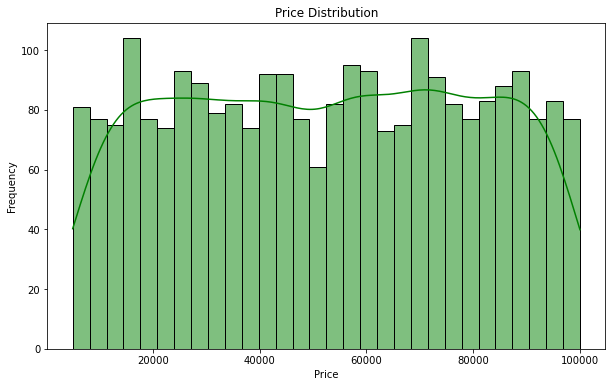

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price'], kde=True, bins=30, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The Price Distribution Graph provides a detailed visualization of car prices in the dataset. Here's a breakdown of its key features and insights:

##### Price Range
Car prices span a broad range, approximately $10,000 to $100,000.
This wide range reflects diversity, with representation across lower-priced and higher-priced cars.

##### Most Common Prices
The $30,000 to $80,000 range is the most frequent, evident from the taller bars in the histogram.
The absence of a distinct peak suggests a relatively even spread of prices within this range.

##### Insights
The dataset's balanced mix of car prices suggests it encompasses various market segments, from economy to luxury vehicles.
The relatively even distribution implies the data is unbiased, making it well-suited for tasks like predictive modeling or market analysis.

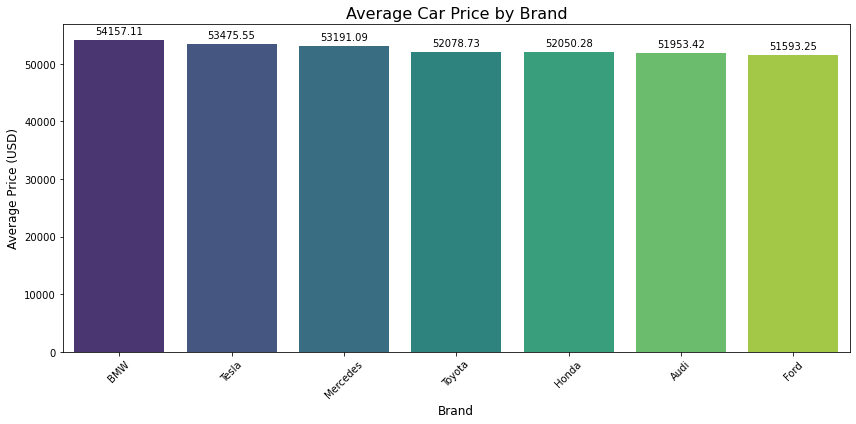

In [83]:
# Plotting the average price by brand with exact values displayed
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette="viridis")

# Adding exact values on top of the bars
for index, value in enumerate(avg_price_by_brand.values):
    plt.text(index, value + 1000, f"{value:.2f}", ha='center', fontsize=10)

plt.title("Average Car Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Consistent Pricing Across Brands

The chart reflects that the average prices among the brands (BMW, Tesla, Mercedes, Toyota, Honda, Audi, Ford) are fairly uniform.
There’s no significant outlier in the dataset, meaning no brand drastically exceeds or falls below the price range of others.
##### Top Brands
Premium brands such as BMW, Tesla, and Mercedes show slightly higher average prices compared to others.
This trend aligns with these brands’ positioning in the luxury or high-performance vehicle market.

##### Insights for Further Analysis
The minimal variation in average prices suggests that other factors (e.g., vehicle year, mileage, or engine specifications) may contribute more significantly to pricing disparities.
Future investigations could delve into specific models within each brand to identify their impact on the overall average price, offering a more granular understanding of pricing trends.

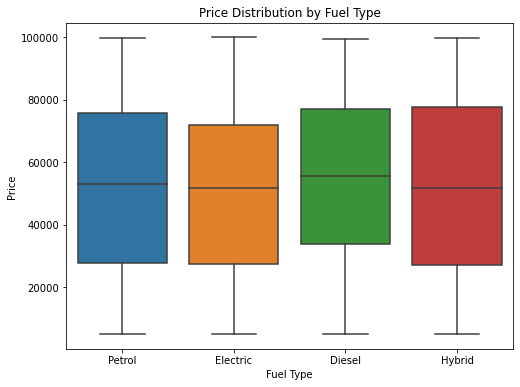

In [84]:
# Price distribution by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='Price', data=car_data)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


##### Interpretation of the Price Distribution by Fuel Type Graph

##### Median Price:

Diesel vehicles exhibit the highest median price, likely due to their harm to the environment.
Petrol and Hybrid cars follow closely, with their median prices being slightly lower than Diesel cars.
Electric vehicles have a comparable median price but tend to align more closely with consistency than extremes since due to governments' electric vehicle incentives.

##### Price Range:

Their price range quite close to each other.

##### Insights:

Hybrid vehicles command a premium, potentially reflecting the added costs of hybrid technology and its perceived benefits.
The narrow pricing of electric cars suggests limited model diversity or fewer vehicles in this category within the dataset, possibly aligned with early-stage adoption or market constraints

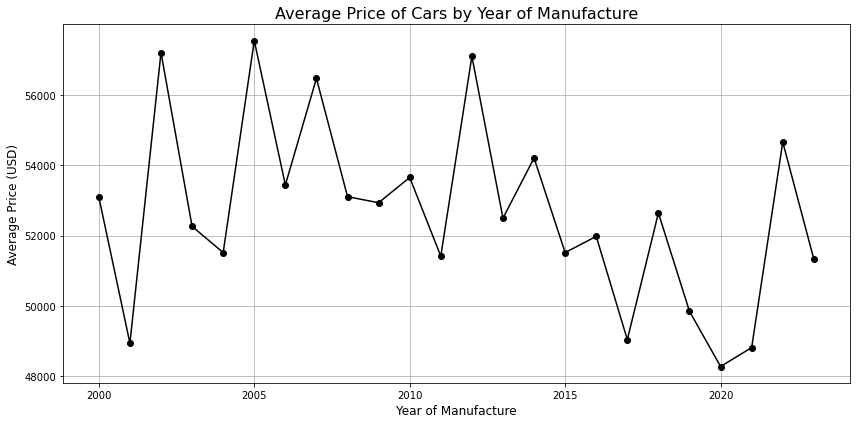

In [85]:
# Calculate average price by year of manufacture
avg_price_by_year = car_data.groupby('Year')['Price'].mean()

# Plotting the average price by year of manufacture
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='black')
plt.title("Average Price of Cars by Year of Manufacture", fontsize=16)
plt.xlabel("Year of Manufacture", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fluctuation Trend:

The graph shows that there were increases and decreases in prices in certain years.
It was seen at the peak of prices between 2005 and 2010, but a downward trend started immediately afterwards.

#### Art After 2020:

A rising trend in prices started again as of 2020. This can be explained by the launch of new vehicle models in the market or the impact of economic use (inflation, inflation) on vehicle prices.

#### Differences Based on Years:

The reasons for the differences between the prices for each year can be found in market conditions, popular vehicle segments or technologies used.

#### Decline Before 2020:

There was a noticeable decrease in prices between 2015-2020. In this case, it may be due to the increase in demand for economical vehicles with low fuel consumption.

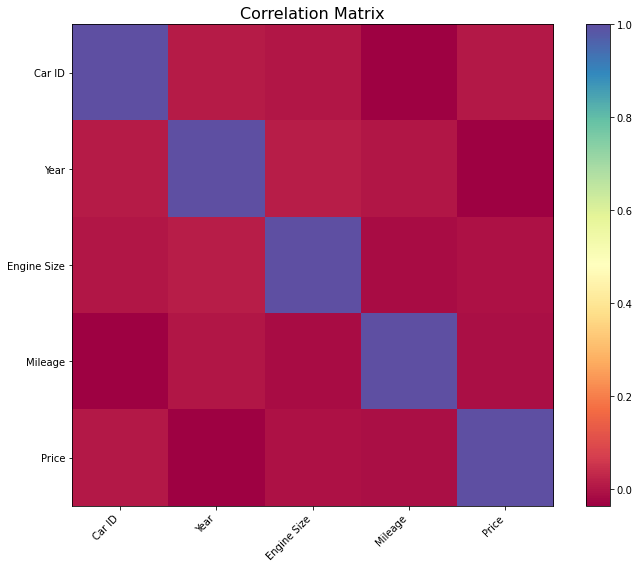

In [86]:
import numpy as np

# Creating a correlation matrix
correlation_matrix = car_data.corr()

# Visualizing correlation matrix with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='Spectral', interpolation='nearest')  # cmap değiştirildi
plt.colorbar()
plt.title("Correlation Matrix", fontsize=16)

# Adding labels
labels = correlation_matrix.columns
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.show()


#### Interpretation of the Correlation Matrix
##### Year vs. Price:

A positive correlation suggests that newer cars generally command higher prices. This trend likely reflects the improved technology, features, and desirability associated with newer models.

##### Mileage vs. Price:

A weak negative correlation indicates that cars with higher mileage tend to have slightly lower prices. This is expected as higher mileage often signifies greater wear and tear, reducing a vehicle's value.

##### Engine Size vs. Price:

The weak positive correlation implies that cars with larger engines are marginally more expensive, but the influence of engine size on price is not particularly strong. This may reflect market trends where engine size is just one of many factors affecting price.

##### General Observations:

The diagonal of the matrix displays perfect correlations (1.0) because each feature is inherently perfectly correlated with itself.
Other correlations are relatively weak, indicating that no single feature strongly determines price, suggesting that car pricing is influenced by a combination of factors.

## PART 3 Feature Engineering

In [87]:
car_data['Car Age'] = 2024 - car_data['Year']
car_data['Car Age']

0        8
1        6
2       11
3       13
4       15
        ..
2495     4
2496    23
2497     3
2498    22
2499    19
Name: Car Age, Length: 2500, dtype: int64

In [88]:
condition_map = {'New': 3, 'Like New': 2, 'Used': 1}
car_data['Condition Score'] = car_data['Condition'].map(condition_map)
car_data['Condition Score']

0       3
1       1
2       3
3       3
4       2
       ..
2495    2
2496    2
2497    2
2498    2
2499    1
Name: Condition Score, Length: 2500, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Feature engineering based on earlier suggestions

# Is Premium Brand
premium_brands = ['Tesla', 'BMW', 'Mercedes']
car_data['Is Premium Brand'] = car_data['Brand'].isin(premium_brands).astype(int)


# Define the scaler
min_max_scaler = MinMaxScaler()

# Columns to scale
columns_to_scale = ['Mileage', 'Price', 'Car Age']

# Apply MinMaxScaler
car_data[columns_to_scale] = min_max_scaler.fit_transform(car_data[columns_to_scale])

# Display the processed data

car_data.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car Age,Condition Score,Is Premium Brand
0,1,Tesla,2016,2.3,Petrol,Manual,0.382785,New,0.227465,Model X,0.304348,3,1
1,2,BMW,2018,4.4,Electric,Manual,0.477326,Used,0.101803,5 Series,0.217391,1,1
2,3,Audi,2013,4.5,Electric,Manual,0.605384,New,0.414771,A4,0.434783,3,0
3,4,Tesla,2011,4.1,Diesel,Automatic,0.228927,New,0.856712,Model Y,0.521739,3,1
4,5,Ford,2009,2.6,Diesel,Manual,0.743432,Like New,0.721964,Mustang,0.608696,2,0
5,6,Audi,2019,2.4,Diesel,Automatic,0.821925,Like New,0.884040,Q7,0.173913,2,0
6,7,Audi,2020,4.0,Electric,Automatic,0.451642,Used,0.615844,Q5,0.130435,1,0
7,8,Tesla,2017,5.3,Hybrid,Automatic,0.276761,New,0.130249,Model Y,0.260870,3,1
8,9,Honda,2023,5.7,Electric,Manual,0.401214,Like New,0.114712,Civic,0.000000,2,0
9,10,Ford,2010,1.5,Electric,Automatic,0.450052,Like New,0.047898,Explorer,0.565217,2,0


In [90]:
# Label Encoding for Brand and Fuel Type
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply to Brand and Fuel Type
car_data['Brand'] = label_encoder.fit_transform(car_data['Brand'])
car_data['Fuel Type'] = label_encoder.fit_transform(car_data['Fuel Type'])
car_data['Model'] = label_encoder.fit_transform(car_data['Model'])

# Display the processed data

car_data.head(10)


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car Age,Condition Score,Is Premium Brand
0,1,5,2016,2.3,3,Manual,0.382785,New,0.227465,19,0.304348,3,1
1,2,1,2018,4.4,1,Manual,0.477326,Used,0.101803,1,0.217391,1,1
2,3,0,2013,4.5,1,Manual,0.605384,New,0.414771,3,0.434783,3,0
3,4,5,2011,4.1,0,Automatic,0.228927,New,0.856712,20,0.521739,3,1
4,5,2,2009,2.6,0,Manual,0.743432,Like New,0.721964,21,0.608696,2,0
5,6,0,2019,2.4,0,Automatic,0.821925,Like New,0.884040,24,0.173913,2,0
6,7,0,2020,4.0,1,Automatic,0.451642,Used,0.615844,23,0.130435,1,0
7,8,5,2017,5.3,2,Automatic,0.276761,New,0.130249,20,0.260870,3,1
8,9,3,2023,5.7,1,Manual,0.401214,Like New,0.114712,8,0.000000,2,0
9,10,2,2010,1.5,1,Automatic,0.450052,Like New,0.047898,11,0.565217,2,0


In [91]:
transmission_map = {'Automatic': 0, 'Manual': 1}
car_data['Transmission'] = car_data['Transmission'].map(transmission_map)
car_data['Transmission']

0       1
1       1
2       1
3       0
4       1
       ..
2495    0
2496    1
2497    1
2498    1
2499    0
Name: Transmission, Length: 2500, dtype: int64

In [92]:
car_data.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car Age,Condition Score,Is Premium Brand
0,1,5,2016,2.3,3,1,0.382785,New,0.227465,19,0.304348,3,1
1,2,1,2018,4.4,1,1,0.477326,Used,0.101803,1,0.217391,1,1
2,3,0,2013,4.5,1,1,0.605384,New,0.414771,3,0.434783,3,0
3,4,5,2011,4.1,0,0,0.228927,New,0.856712,20,0.521739,3,1
4,5,2,2009,2.6,0,1,0.743432,Like New,0.721964,21,0.608696,2,0
5,6,0,2019,2.4,0,0,0.821925,Like New,0.884040,24,0.173913,2,0
6,7,0,2020,4.0,1,0,0.451642,Used,0.615844,23,0.130435,1,0
7,8,5,2017,5.3,2,0,0.276761,New,0.130249,20,0.260870,3,1
8,9,3,2023,5.7,1,1,0.401214,Like New,0.114712,8,0.000000,2,0
9,10,2,2010,1.5,1,0,0.450052,Like New,0.047898,11,0.565217,2,0


In [93]:
car_data['Engine-Fuel Interaction'] = car_data['Engine Size'].round(2).astype(str) + '-' + car_data['Fuel Type'].astype(str)
car_data['Engine-Fuel Interaction']

0       2.3-3
1       4.4-1
2       4.5-1
3       4.1-0
4       2.6-0
        ...  
2495    2.4-3
2496    5.7-2
2497    1.1-2
2498    4.5-0
2499    4.6-0
Name: Engine-Fuel Interaction, Length: 2500, dtype: object

In [94]:
car_data.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car Age,Condition Score,Is Premium Brand,Engine-Fuel Interaction
0,1,5,2016,2.3,3,1,0.382785,New,0.227465,19,0.304348,3,1,2.3-3
1,2,1,2018,4.4,1,1,0.477326,Used,0.101803,1,0.217391,1,1,4.4-1
2,3,0,2013,4.5,1,1,0.605384,New,0.414771,3,0.434783,3,0,4.5-1
3,4,5,2011,4.1,0,0,0.228927,New,0.856712,20,0.521739,3,1,4.1-0
4,5,2,2009,2.6,0,1,0.743432,Like New,0.721964,21,0.608696,2,0,2.6-0
5,6,0,2019,2.4,0,0,0.821925,Like New,0.884040,24,0.173913,2,0,2.4-0
6,7,0,2020,4.0,1,0,0.451642,Used,0.615844,23,0.130435,1,0,4.0-1
7,8,5,2017,5.3,2,0,0.276761,New,0.130249,20,0.260870,3,1,5.3-2
8,9,3,2023,5.7,1,1,0.401214,Like New,0.114712,8,0.000000,2,0,5.7-1
9,10,2,2010,1.5,1,0,0.450052,Like New,0.047898,11,0.565217,2,0,1.5-1


In [95]:
car_data['Age-Condition Interaction'] = car_data['Car Age'] * car_data['Condition Score']


In [96]:

car_data['Engine Category'] = pd.cut(car_data['Engine Size'], bins=[0, 1.5, 2.5, 5,10], labels=[1, 2, 3,4])
car_data['Engine Category']

0       2
1       3
2       3
3       3
4       3
       ..
2495    2
2496    4
2497    1
2498    3
2499    3
Name: Engine Category, Length: 2500, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [97]:
car_data

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car Age,Condition Score,Is Premium Brand,Engine-Fuel Interaction,Age-Condition Interaction,Engine Category
0,1,5,2016,2.3,3,1,0.382785,New,0.227465,19,0.304348,3,1,2.3-3,0.913043,2
1,2,1,2018,4.4,1,1,0.477326,Used,0.101803,1,0.217391,1,1,4.4-1,0.217391,3
2,3,0,2013,4.5,1,1,0.605384,New,0.414771,3,0.434783,3,0,4.5-1,1.304348,3
3,4,5,2011,4.1,0,0,0.228927,New,0.856712,20,0.521739,3,1,4.1-0,1.565217,3
4,5,2,2009,2.6,0,1,0.743432,Like New,0.721964,21,0.608696,2,0,2.6-0,1.217391,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,0,2020,2.4,3,0,0.075462,Like New,0.593577,23,0.130435,2,0,2.4-3,0.260870,2
2496,2497,0,2001,5.7,2,1,0.258995,Like New,0.207421,2,0.956522,2,0,5.7-2,1.913043,4
2497,2498,2,2021,1.1,2,1,0.909519,Like New,0.262092,12,0.086957,2,0,1.1-2,0.173913,1
2498,2499,0,2002,4.5,0,1,0.763952,Like New,0.432493,23,0.913043,2,0,4.5-0,1.826087,3


## PART 4 Model Training

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target (y)
X = car_data.drop(columns=['Price',"Condition","Engine-Fuel Interaction","Car ID"])  # Drop the target variable
y = np.log1p(car_data['Price'])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.03959358742084522, -0.004447465075088086)

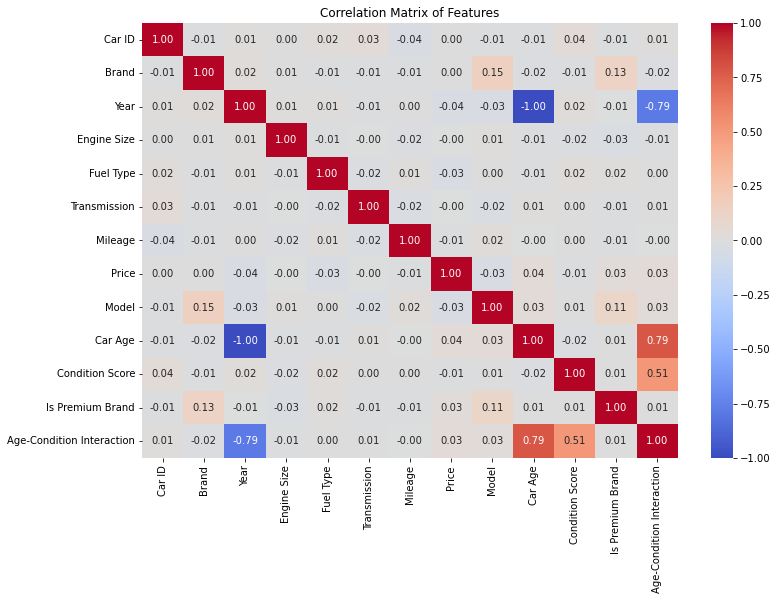

[('Year', 'Car Age', -0.9999999999999974),
 ('Car Age', 'Year', -0.9999999999999974)]

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = car_data.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

# Identify highly correlated features (absolute correlation > 0.8)
high_corr_pairs = [(col1, col2, correlation_matrix.loc[col1, col2])
                   for col1 in correlation_matrix.columns
                   for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8]

high_corr_pairs


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

rf_mse, rf_r2

(0.040884892643766366, -0.03720651375675654)

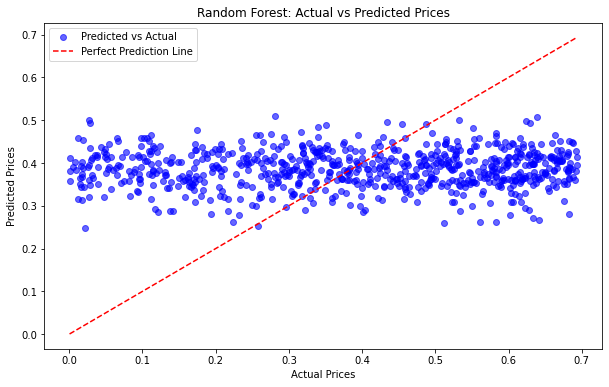

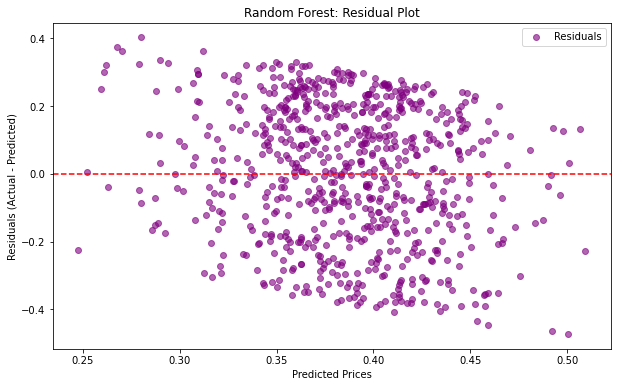

In [101]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.legend()
plt.show()

# Residual plot (errors)
residuals = y_test - rf_predictions
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, residuals, alpha=0.6, color='purple', label="Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest: Residual Plot")
plt.legend()
plt.show()


In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(scores.mean())


-0.03326948197202908


In [103]:
y_transformed = y**2

# Split the data with the transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Train the Random Forest model again
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Transform predictions back to the original scale by taking the square root
rf_predictions_transformed_back = np.sqrt(rf_predictions)
y_test_transformed_back = np.sqrt(y_test)

# Evaluate the model on the transformed scale
mse_transformed = mean_squared_error(y_test_transformed_back, rf_predictions_transformed_back)
r2_transformed = r2_score(y_test_transformed_back, rf_predictions_transformed_back)

mse_transformed, r2_transformed

(0.04220475890752083, -0.07230261844322605)

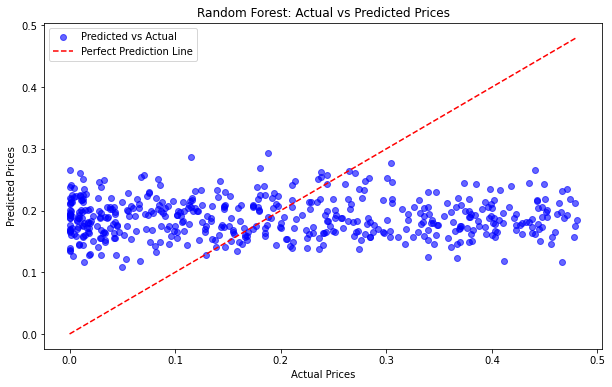

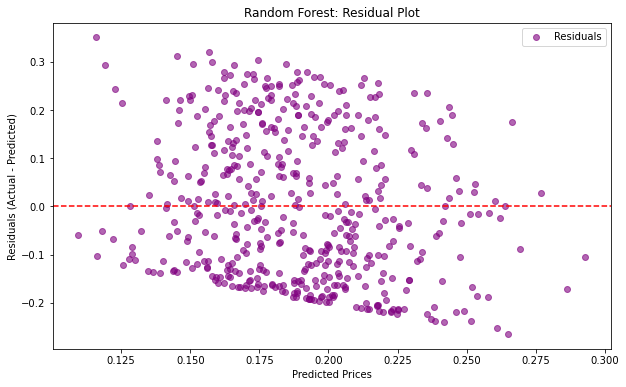

In [104]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.legend()
plt.show()

# Residual plot (errors)
residuals = y_test - rf_predictions
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, residuals, alpha=0.6, color='purple', label="Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest: Residual Plot")
plt.legend()
plt.show()


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=10)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting MSE: {gb_mse}")
print(f"Gradient Boosting R2: {gb_r2}")

Gradient Boosting MSE: 0.02814558449901483
Gradient Boosting R2: -0.2782471892147418


In [106]:

for lr in [0.01, 0.05, 0.1, 0.2, 0.5]:
    gb_model = GradientBoostingRegressor(learning_rate=lr, n_estimators=100, max_depth=10, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_predictions = gb_model.predict(X_test)
    mse = mean_squared_error(y_test, gb_predictions)
    r2 = r2_score(y_test, gb_predictions)
    print(f"Learning Rate: {lr} | MSE: {mse:.4f} | R²: {r2:.4f}")

Learning Rate: 0.01 | MSE: 0.0236 | R²: -0.0714
Learning Rate: 0.05 | MSE: 0.0261 | R²: -0.1835
Learning Rate: 0.1 | MSE: 0.0281 | R²: -0.2782
Learning Rate: 0.2 | MSE: 0.0297 | R²: -0.3467
Learning Rate: 0.5 | MSE: 0.0327 | R²: -0.4829


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Prepare the data (drop non-numeric features for simplicity)
numeric_data = car_data.select_dtypes(include=[np.number]).dropna()

# Features and target
X = numeric_data.drop(columns=['Price'])
y = numeric_data['Price']

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid for tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
random_search.fit(X, y)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params,best_score

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\marda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marda\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\marda\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\marda\anaconda3\lib\site-packages

({'n_estimators': 500,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'log2',
  'max_depth': 10},
 -0.0837359828580678)

In [108]:
# Applying the best parameters from RandomizedSearchCV
optimized_rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    random_state=42
)

# Fit the optimized model
optimized_rf_model.fit(X_train, y_train)

# Evaluate the optimized model
train_score = optimized_rf_model.score(X_train, y_train)
test_score = optimized_rf_model.score(X_test, y_test)

print("Optimized Model - Train Score:",train_score)
print("Optimized Model - Test Score:",test_score)

Optimized Model - Train Score: 0.34122492281332817
Optimized Model - Test Score: -0.02712086193461105
